In [165]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Preprocessing the raw data

In [196]:
# iterate over all WASDE csv files in the data folder and vertically concatenate them
path = 'data collection/WASDE data/*/*.csv'
all_files = glob.glob(path)
df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(832923, 16)


,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Beginning Stocks,NaN,Sugar,Mexico,2021/22,Est.,Annual,1053.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
1,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2021/22,Est.,Annual,4547.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
2,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2021/22,Est.,Annual,947.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
3,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2021/22,Est.,Annual,1794.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
4,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2021/22,Est.,Annual,50.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8


In [220]:
crude_oil_df = pd.read_csv('data collection/Crude Oil WTI Futures Historical Data - daily data 10 years.csv')
gold_df = pd.read_csv('data collection/SPDR Gold Shares (GLD) - yahoo finance, 10 years.csv')
sp500_df = pd.read_csv('data collection/S&P 500 Historical Data - daily data 10 years.csv')
silver_df = pd.read_csv('data collection/Silver Futures Historical Data - daily data 10 years.csv')
corn_df = pd.read_csv('data collection/US Corn Futures Historical Data - daily data 10 years.csv')
dollar_rate_df = pd.read_csv('data collection/US Dollar Index Historical Data - daily data 10 years.csv')
soybean_df = pd.read_csv('data collection/US Soybeans Futures Historical Data - daily data 10 years.csv')

cpi_df = pd.read_csv('data collection/Customer Price Index.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m-%d')
cpi_df = cpi_df[cpi_df['DATE'] >= '2013-01']
cpi_df.rename(columns={'CPIAUCSL':'CPI', 'DATE':'Date'}, inplace=True)
ppi_df = pd.read_csv('data collection/Producer Price Index.csv')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m-%d')
ppi_df.rename(columns={'PPIACO':'PPI', 'DATE':'Date'}, inplace=True)
ppi_df
dfs_dict = {
    'crude_oil_df': crude_oil_df,
    #'food_price_df': food_price_df,
    'gold_df': gold_df,
    'sp500_df': sp500_df,
    'silver_df': silver_df,
    #'corn_df': corn_df,
    'dollar_rate_df': dollar_rate_df,
    #'soybean_df': soybean_df
    'cpi_df': cpi_df,
    'ppi_df': ppi_df,
}

In [221]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low     Vol. Change %
 0     07/29/2024  75.56  77.28  77.69  75.52      NaN   -2.21%
 1     07/28/2024  77.27  77.47  77.48  77.22      NaN    0.14%
 2     07/26/2024  77.16  78.35  78.60  76.19  365.12K   -1.43%
 3     07/25/2024  78.28  77.50  78.47  76.04  457.29K    0.89%
 4     07/24/2024  77.59  77.45  78.19  76.98  355.97K    0.82%
 ...          ...    ...    ...    ...    ...      ...      ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195.87K   -0.04%
 3040  01/07/2013  93.19  93.21  93.35  92.42  166.29K    0.11%
 3041  01/04/2013  93.09  92.86  93.21  91.52  210.75K    0.18%
 3042  01/03/2013  92.92  92.91  93.30  92.49  189.81K   -0.21%
 3043  01/02/2013  93.12  91.78  93.87  91.56  203.87K    1.42%
 
 [3044 rows x 7 columns],
 'gold_df':             Date        Open        High         Low       Close   Adj Close  \
 0     2014-01-02  117.930000  118.730003  117.750000  118.000000  118.000000   
 1     2014-01-

In [172]:
"""# Identify and drop columns that start with "Unnamed"
food_price_df = pd.read_csv('data collection/Food_price_indices_data_jul.csv')
food_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith('Unnamed')]
food_price_df['Date'] = pd.to_datetime(food_price_df['Date'], format='%Y-%m')

# Filter rows starting from January 2013
filtered_foodprice_df = food_price_df[food_price_df['Date'] >= '2013-01']
filtered_foodprice_df['Date'] = filtered_foodprice_df['Date'].dt.strftime('%Y-%m')
rename_dict = {
    'Meat': 'Meat FP Index',
    'Dairy': 'Dairy FP Index',
    'Cereals': 'Cereals FP Index',
    'Oils': 'Oils FP Index',
    'Sugar': 'Sugar FP Index'
}
# Rename columns
filtered_foodprice_df.rename(columns=rename_dict, inplace=True)
# Display the filtered DataFrame
print(filtered_foodprice_df)"""

        Date  Food Price Index  Meat FP Index  Dairy FP Index  \
276  2013-01             123.4          106.5           121.0   
277  2013-02             123.3          107.6           123.8   
278  2013-03             122.9          108.0           128.0   
279  2013-04             122.9          108.7           140.8   
280  2013-05             122.1          105.5           140.0   
..       ...               ...            ...             ...   
409  2024-02             117.4          112.5           120.7   
410  2024-03             119.0          115.0           124.0   
411  2024-04             119.3          116.7           123.8   
412  2024-05             120.6          117.0           126.3   
413  2024-06             120.6          116.9           127.8   

     Cereals FP Index  Oils FP Index  Sugar FP Index  
276             145.2         124.28           116.8  
277             142.3         125.55           113.0  
278             139.9         122.38           114.3  

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/1875306611.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foodprice_df['Date'] = filtered_foodprice_df['Date'].dt.strftime('%Y-%m')
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/1875306611.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foodprice_df.rename(columns=rename_dict, inplace=True)


In [222]:
def replace_symbols(value):
    if isinstance(value, (int, float, complex)):
        return value
    if isinstance(value, str):
        if '%' in value:
            return float(value.replace('%', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif ',' in value:
            return float(value.replace(',', ''))
    return value

for df_name, df in dfs_dict.items():
    try:
        # Convert all columns except 'Date' using replace_symbols
        for col in df.columns:
            if col != 'Date':
                df[col] = df[col].apply(replace_symbols)

        # Display the DataFrame overview and boxplot
        """ print(f"Overview of {df_name}:")
        print(df)
        
        # Plot boxplots
        plt.figure(figsize=(10, 6))
        df.drop(columns='Date').boxplot()
        plt.title(f'Boxplot of {df_name}')
        plt.show()"""
    
    except Exception as e:
        print(f"Error with {df_name}: {e}")
        continue



In [223]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low      Vol.  Change %
 0     07/29/2024  75.56  77.28  77.69  75.52       NaN     -2.21
 1     07/28/2024  77.27  77.47  77.48  77.22       NaN      0.14
 2     07/26/2024  77.16  78.35  78.60  76.19  365120.0     -1.43
 3     07/25/2024  78.28  77.50  78.47  76.04  457290.0      0.89
 4     07/24/2024  77.59  77.45  78.19  76.98  355970.0      0.82
 ...          ...    ...    ...    ...    ...       ...       ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195870.0     -0.04
 3040  01/07/2013  93.19  93.21  93.35  92.42  166290.0      0.11
 3041  01/04/2013  93.09  92.86  93.21  91.52  210750.0      0.18
 3042  01/03/2013  92.92  92.91  93.30  92.49  189810.0     -0.21
 3043  01/02/2013  93.12  91.78  93.87  91.56  203870.0      1.42
 
 [3044 rows x 7 columns],
 'gold_df':             Date        Open        High         Low       Close   Adj Close  \
 0     2014-01-02  117.930000  118.730003  117.750000  118.000000  118.0

In [224]:
for df in dfs_dict.values():
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to include dataframe name as prefix
for name, df in dfs_dict.items():
    prefix = name.replace('_df', '')  # Remove '_df' from dataframe name
    df.rename(columns=lambda x: f"{prefix}_{x}" if x != 'Date' else x, inplace=True)

# Start with the first dataframe
merged_df = list(dfs_dict.values())[0]
print(merged_df)
# Iteratively merge remaining dataframes
for df in list(dfs_dict.values())[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High  \
0    2024-07-29            75.56           77.28           77.69   
1    2024-07-28            77.27           77.47           77.48   
2    2024-07-26            77.16           78.35           78.60   
3    2024-07-25            78.28           77.50           78.47   
4    2024-07-24            77.59           77.45           78.19   
...         ...              ...             ...             ...   
3039 2013-01-08            93.15           93.32           93.80   
3040 2013-01-07            93.19           93.21           93.35   
3041 2013-01-04            93.09           92.86           93.21   
3042 2013-01-03            92.92           92.91           93.30   
3043 2013-01-02            93.12           91.78           93.87   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %  
0             75.52             NaN               -2.21  
1             77.22             NaN                0.14  
2        

In [227]:
# Filter the DataFrame from 2014 onwards
merged_df = merged_df[merged_df['Date'].dt.year >= 2014]

# Display the filtered DataFrame
print(merged_df)

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High  \
264  2014-01-01            98.70           98.61           98.76   
265  2014-01-02            95.44           98.50           98.97   
266  2014-01-03            93.96           95.47           95.74   
267  2014-01-06            93.43           94.18           94.59   
268  2014-01-07            93.67           93.60           94.22   
...         ...              ...             ...             ...   
3127 2024-08-26              NaN             NaN             NaN   
3128 2024-08-27              NaN             NaN             NaN   
3129 2024-08-28              NaN             NaN             NaN   
3130 2024-08-29              NaN             NaN             NaN   
3131 2024-08-30              NaN             NaN             NaN   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %   gold_Open  \
264           98.54             NaN                0.28         NaN   
265           95.34        251250.0      

In [228]:
cleaned_df = merged_df.dropna(axis=1, how='all')
cleaned_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,...,silver_Low,silver_Vol.,silver_Change %,dollar_rate_Price,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI
264,2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,...,NaN,NaN,NaN,80.03,80.21,80.24,80.10,0.00,235.288,203.8
265,2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,...,19.430,44690.0,3.91,80.63,80.12,80.71,80.08,0.75,NaN,NaN
266,2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,...,19.985,30030.0,0.41,80.79,80.57,80.89,80.49,0.20,NaN,NaN
267,2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,...,19.950,38850.0,-0.53,80.65,80.86,80.91,80.54,-0.17,NaN,NaN
268,2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,...,19.625,38360.0,-1.57,80.83,80.69,80.95,80.60,0.22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2024-08-26,NaN,NaN,NaN,NaN,NaN,NaN,233.449997,233.500000,232.059998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3128,2024-08-27,NaN,NaN,NaN,NaN,NaN,NaN,231.690002,233.470001,231.570007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3129,2024-08-28,NaN,NaN,NaN,NaN,NaN,NaN,232.000000,232.020004,230.729996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3130,2024-08-29,NaN,NaN,NaN,NaN,NaN,NaN,231.949997,233.610001,231.919998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# Filling NaNs of Sundays (there are Nans on Sundays in all colums except of soybean prices)
sunday_nan_columns = [col for col in cleaned_df.columns if not col.startswith('soy')]
sunday_nan_columns.remove('Date')
cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
cleaned_df['is_holiday'] = 0
# Update 'is_holiday' to 1 where 'soybean_Price' is NaN
cleaned_df.loc[cleaned_df['gold_Close'].isna(), 'is_holiday'] = 1
cleaned_df

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/646398149.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/646398149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/646398149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,...,silver_Vol.,silver_Change %,dollar_rate_Price,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday
264,2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,...,NaN,NaN,80.03,80.21,80.24,80.10,0.00,235.288,203.800,1
265,2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,...,44690.0,3.91,80.63,80.12,80.71,80.08,0.75,235.288,203.800,0
266,2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,...,30030.0,0.41,80.79,80.57,80.89,80.49,0.20,235.288,203.800,0
267,2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,...,38850.0,-0.53,80.65,80.86,80.91,80.54,-0.17,235.288,203.800,0
268,2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,...,38360.0,-1.57,80.83,80.69,80.95,80.60,0.22,235.288,203.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2024-08-26,75.56,77.28,77.69,75.52,365120.0,-2.21,233.449997,233.500000,232.059998,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0
3128,2024-08-27,75.56,77.28,77.69,75.52,365120.0,-2.21,231.690002,233.470001,231.570007,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0
3129,2024-08-28,75.56,77.28,77.69,75.52,365120.0,-2.21,232.000000,232.020004,230.729996,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0
3130,2024-08-29,75.56,77.28,77.69,75.52,365120.0,-2.21,231.949997,233.610001,231.919998,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0


In [181]:
print(cleaned_df)

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High  \
0    2013-01-01              NaN             NaN             NaN   
1    2013-01-02            93.12           91.78           93.87   
2    2013-01-03            92.92           92.91           93.30   
3    2013-01-04            93.09           92.86           93.21   
4    2013-01-06            93.09           92.86           93.21   
...         ...              ...             ...             ...   
3107 2024-08-26            75.56           77.28           77.69   
3108 2024-08-27            75.56           77.28           77.69   
3109 2024-08-28            75.56           77.28           77.69   
3110 2024-08-29            75.56           77.28           77.69   
3111 2024-08-30            75.56           77.28           77.69   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %   gold_Open  \
0               NaN             NaN                 NaN         NaN   
1             91.56        203870.0      

In [183]:
"""cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
filtered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')

cleaned_df['YearMonth'] = cleaned_df['Date'].dt.to_period('M')

# Extract year-month from monthly data
filtered_foodprice_df['YearMonth'] = filtered_foodprice_df['Date'].dt.to_period('M')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m')

# Extract year-month from CPI and PPI data
cpi_df['YearMonth'] = cpi_df['DATE'].dt.to_period('M')
ppi_df['YearMonth'] = ppi_df['DATE'].dt.to_period('M')
cpi_df = cpi_df[['YearMonth', 'CPI']]
ppi_df = ppi_df[['YearMonth', 'PPI']]
filtered_foodprice_df.drop(columns='Date', inplace=True)

# Merge CPI and PPI data with all_data_df
all_data_df = pd.merge(cleaned_df, cpi_df, on='YearMonth', how='left')
all_data_df = pd.merge(all_data_df, ppi_df, on='YearMonth', how='left')
# Merge DataFrames on YearMonth
#all_data_df = pd.merge(all_data_df, filtered_foodprice_df, on='YearMonth', how='left')

# Drop the temporary YearMonth column
all_data_df.drop(columns='YearMonth', inplace=True)"""


/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/2874835464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/2874835464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/2874835464.py:7: SettingWithCopyWarning: 
A 

In [236]:
all_data_df = cleaned_df

In [185]:
all_data_df.to_csv('data collection/all_data.csv', index=False)

In [237]:
# Load your dataset (adjust the path if needed)
df = all_data_df
# Set the Date column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/1859751631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Python/3.9/site-p

                               SARIMAX Results                                
Dep. Variable:             gold_Close   No. Observations:                 2293
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -3697.797
Date:                Fri, 06 Sep 2024   AIC                           7415.594
Time:                        14:13:20   BIC                           7472.965
Sample:                             0   HQIC                          7436.514
                               - 2293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1386      0.016      8.509      0.000       0.107       0.171
ar.L2         -1.0128      0.015    -66.406      0.000      -1.043      -0.983
ar.L3          0.0164      0.023      0.705      0.4

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/1704447799.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predictions = [float(pred) for pred in predictions]


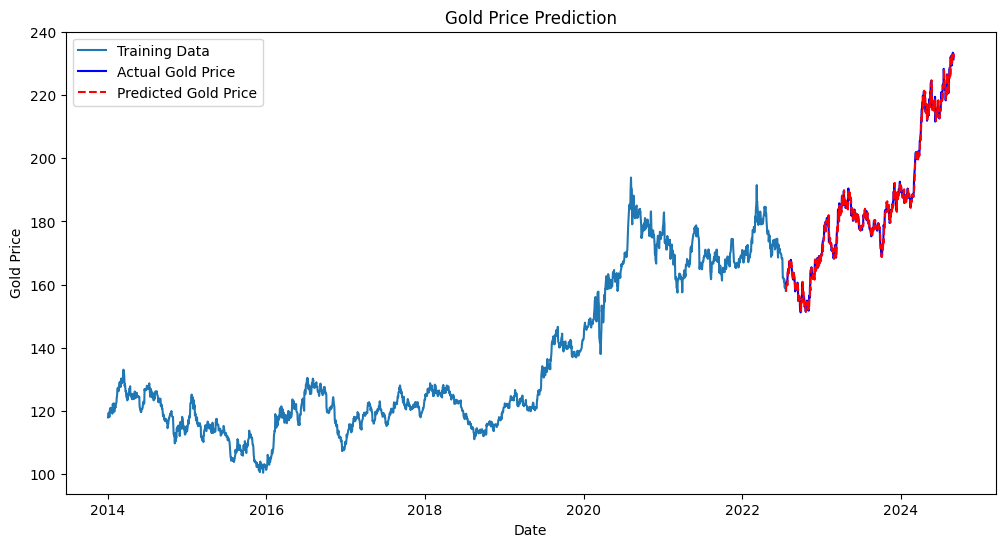

Root Mean Square Error: 1.6742261525473574
Mean Absolute Error: 1.24457523317401


In [266]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use only the gold_Price column for the ARIMA model
gold_prices = df['gold_Close'].dropna()  # Drop missing values

# Split the data into training and testing sets
train_size = int(len(gold_prices) * 0.8)  # 80% training, 20% testing
train_data, test_data = gold_prices[:train_size], gold_prices[train_size:]

# Define and fit the ARIMA model (p, d, q)
# p=4 - looking 4 days back
# d=1 - using the differences (?)
# q=2 - using 2 last errors (?)
model = ARIMA(train_data, order=(7, 1, 2)) 
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

# Forecasting one day ahead using the true data each time
history = list(train_data)  # Create a list from the training data
predictions = []

for t in range(len(test_data)):
    print(t)
    yhat = model_fit.forecast(steps=1)
    predictions.append(yhat)
    history.append(test_data.iloc[t])
    model_fit = model_fit.append([test_data.iloc[t]])
    #model_fit = model_fit.append([yhat])

# Convert predictions to a list of numbers
predictions = [float(pred) for pred in predictions]

# Convert predictions to a DataFrame for easier plotting
pred_index = gold_prices.index[train_size:]  # Create an index for predictions
predictions_df = pd.DataFrame(predictions, index=pred_index, columns=['Predictions'])

# Combine predictions and actual test data
test_data = test_data.to_frame()
test_data = test_data.join(predictions_df)
print(test_data)
# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data['gold_Close'], color='blue', label='Actual Gold Price')
plt.plot(test_data.index, test_data['Predictions'], color='red', linestyle='--', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['gold_Close'], test_data['Predictions']))
mae = mean_absolute_error(test_data['gold_Close'], test_data['Predictions'])

print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

LR: 
Mean Absolute Error (MAE): 1.2008843431040424
Root Mean Squared Error (RMSE): 1.635357918772382

In [188]:
pred_index

Timestamp('2022-07-25 00:00:00')

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Initialize predictions list
predictions = []

# Copy the initial train_data
current_data = train_data.copy()

# Forecast one step at a time
for i in range(len(test_data[:50])):
    # Fit the model on the current data
    model = ARIMA(current_data, order=(4, 1, 2))
    model_fit = model.fit()
    
    # Forecast the next step
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast)
    
    # Update current_data with the forecasted value
    # Convert forecast to a DataFrame and concatenate
    forecast_series = pd.Series(forecast, index=[test_data[:50].index[i]])
    current_data = pd.concat([current_data, forecast_series])
    
    
    # If the dataset is large, consider trimming it to keep a manageable size
print(predictions)
# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, index=test_data[:50].index, columns=['Predictions'])
# Check the result
print('Predictions DataFrame:')
print(predictions_df.head())


In [ ]:
predictions[0]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data['gold_Price'], color='blue', label='Actual Gold Price')
plt.plot(test_data.index, test_data['Predictions'], color='red', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylim(1800, 2000)
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Sample data
dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
gold_prices = pd.Series(np.random.randn(10), index=dates)
train_size = 7
predictions = np.random.randn(len(gold_prices) - train_size)
print(predictions)

# Index for predictions
index_for_predictions = gold_prices.index[train_size:]

# Debug output
print("Index for predictions:")
print(index_for_predictions)
print("Predictions:")
print(predictions)

# Create DataFrame
predictions_df = pd.DataFrame(predictions, index=index_for_predictions, columns=['Predictions'])
print("Predictions DataFrame:")
print(predictions_df)


In [ ]:
all_data_df.to_csv('all_data.csv', index=False)

In [ ]:
all_data_df['gold_price_in_7_days'] = all_data_df['gold_Price'].shift(-7)
all_data_df['gold_price_in_30_days'] = all_data_df['gold_Price'].shift(-30)

In [ ]:
len(all_data_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_clean = all_data_df.loc[:, ~all_data_df.columns.str.contains(r'corn|soybean|Dairy|Sugar|Meat|Food|Cereals|Oils|CPI|PPI')]
df_clean = df_clean.dropna()



In [238]:
all_data_df['gold_price_to_predict'] = all_data_df['gold_Close'].shift(-1)
all_data_df['gold_price_yesterday'] = all_data_df['gold_Close'].shift(1)
all_data_df['gold_price_2days'] = all_data_df['gold_Close'].shift(2)
all_data_df['gold_price_3days'] = all_data_df['gold_Close'].shift(3)
all_data_df

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/1155766837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['gold_price_to_predict'] = all_data_df['gold_Close'].shift(-1)


,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,gold_price_to_predict,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,NaN,...,80.24,80.10,0.00,235.288,203.800,1,118.000000,NaN,NaN,NaN
2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,118.000000,...,80.71,80.08,0.75,235.288,203.800,0,119.290001,NaN,NaN,NaN
2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,119.290001,...,80.89,80.49,0.20,235.288,203.800,0,119.500000,118.000000,NaN,NaN
2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,119.500000,...,80.91,80.54,-0.17,235.288,203.800,0,118.820000,119.290001,118.000000,NaN
2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,118.820000,...,80.95,80.60,0.22,235.288,203.800,0,118.120003,119.500000,119.290001,118.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,75.56,77.28,77.69,75.52,365120.0,-2.21,233.449997,233.500000,232.059998,232.759995,...,104.67,104.14,0.27,313.049,255.419,0,233.389999,232.020004,229.369995,232.149994
2024-08-27,75.56,77.28,77.69,75.52,365120.0,-2.21,231.690002,233.470001,231.570007,233.389999,...,104.67,104.14,0.27,313.049,255.419,0,231.750000,232.759995,232.020004,229.369995
2024-08-28,75.56,77.28,77.69,75.52,365120.0,-2.21,232.000000,232.020004,230.729996,231.750000,...,104.67,104.14,0.27,313.049,255.419,0,232.949997,233.389999,232.759995,232.020004


In [195]:
all_data_df

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %,is_holiday,CPI,PPI,gold_price_shifted
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,231.679,202.5,NaN
2013-01-02,93.12,91.78,93.87,91.56,203870.0,1.42,NaN,NaN,NaN,NaN,...,1393.13,1432.63,1433.0,1386.38,NaN,-1.09,0,231.679,202.5,NaN
2013-01-03,92.92,92.91,93.30,92.49,189810.0,-0.21,NaN,NaN,NaN,NaN,...,1391.25,1393.13,1395.63,1372.63,NaN,-0.13,0,231.679,202.5,NaN
2013-01-04,93.09,92.86,93.21,91.52,210750.0,0.18,NaN,NaN,NaN,NaN,...,1365.75,1391.38,1397.13,1356.13,NaN,-1.83,0,231.679,202.5,NaN
2013-01-06,93.09,92.86,93.21,91.52,210750.0,0.18,NaN,NaN,NaN,NaN,...,1363.25,1367.13,1367.25,1357.63,NaN,-0.18,0,231.679,202.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,75.56,77.28,77.69,75.52,365120.0,-2.21,233.449997,233.500000,232.059998,232.759995,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,233.389999
2024-08-27,75.56,77.28,77.69,75.52,365120.0,-2.21,231.690002,233.470001,231.570007,233.389999,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,231.750000
2024-08-28,75.56,77.28,77.69,75.52,365120.0,-2.21,232.000000,232.020004,230.729996,231.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,232.949997


In [259]:
X = all_data_df.drop(columns=['gold_price_to_predict'])

# Extract y
y = all_data_df['gold_price_to_predict']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [260]:
X_train

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,NaN,...,80.21,80.24,80.10,0.00,235.288,203.800,1,NaN,NaN,NaN
2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,118.000000,...,80.12,80.71,80.08,0.75,235.288,203.800,0,NaN,NaN,NaN
2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,119.290001,...,80.57,80.89,80.49,0.20,235.288,203.800,0,118.000000,NaN,NaN
2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,119.500000,...,80.86,80.91,80.54,-0.17,235.288,203.800,0,119.290001,118.000000,NaN
2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,118.820000,...,80.69,80.95,80.60,0.22,235.288,203.800,0,119.500000,119.290001,118.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-14,95.78,96.57,97.00,90.56,387530.0,-0.54,159.020004,159.830002,158.220001,159.330002,...,108.14,109.29,108.14,0.54,294.977,272.274,0,161.600006,160.830002,161.429993
2022-07-15,97.59,96.39,99.03,94.57,240770.0,1.89,159.009995,159.250000,158.350006,159.009995,...,108.67,108.71,107.91,-0.44,294.977,272.274,0,159.330002,161.600006,160.830002
2022-07-18,102.60,97.27,102.80,95.85,84670.0,5.13,160.080002,160.429993,159.050003,159.160004,...,107.98,108.04,106.89,-0.64,294.977,272.274,0,159.009995,159.330002,161.600006


In [265]:
#data_len = len(df_clean)
"""features = df_clean.loc[:, ~df_clean.columns.str.contains('gold')]
gold = df_clean['gold_price_in_7_days']
X_train = features.iloc[:int(data_len*0.8)]
X_test = features.iloc[int(data_len*0.8):]
y_train = gold.iloc[:int(data_len*0.8)]
y_test = gold.iloc[int(data_len*0.8):]"""
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Drop rows with NaN in X_test and y_test
X_test_dropped = X_test.dropna()
y_test_dropped = y_test.loc[X_test_dropped.index]  # Drop NaNs based on indices in X_test_dropped

# Ensure that y_test_dropped does not contain NaN values
X_test_dropped = X_test_dropped.dropna()
y_test_dropped = y_test_dropped.dropna()

# Check if indices still match after dropping NaNs
common_index = X_test_dropped.index.intersection(y_test_dropped.index)
X_test_dropped = X_test_dropped.loc[common_index]
y_test_dropped = y_test_dropped.loc[common_index]
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_dropped, y_train_dropped)

# Predict on test data
y_pred = model.predict(X_test_dropped)
#print(model.summary)
# Evaluate the model
mse = mean_squared_error(y_test_dropped, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_dropped, y_pred)
mae = mean_absolute_error(y_test_dropped, y_pred)


print("Linear Regression Model Summary")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Summary
Intercept: 0.8942773138994937
Coefficients: [-1.27783821e-01 -9.97125887e-02  1.64038437e-01  6.44011822e-02
 -2.11175128e-07  1.20108213e-02  1.77980623e-02 -1.33847944e-01
  9.26416491e-02  5.20095931e-01  5.20095931e-01  7.48899965e-09
  1.23358993e-03 -1.85111747e-04 -1.62195633e-03  7.58639416e-04
 -5.72889832e-03 -1.61241491e-01  1.52980023e-01  2.70671242e-01
 -3.10323340e-01 -3.37250993e-06  2.13729826e-02  1.40609082e-01
 -2.80037533e-01  3.76724489e-02  8.53044698e-02 -1.46524877e-01
  1.65354358e-02 -1.28223964e-02  0.00000000e+00 -4.28119139e-02
  2.68295478e-02 -3.45463634e-03]
Mean Squared Error (MSE): 2.6743955224915363
Mean Absolute Error (MAE): 1.2008843431040424
Root Mean Squared Error (RMSE): 1.635357918772382
R-squared (R2): 0.9934277765319706


In [263]:
comparison_df = pd.DataFrame({
    'Actual': y_test_dropped,
    'Predicted': y_pred
})

# Display the first few rows of the DataFrame
print(comparison_df.head())

                Actual   Predicted
Date                              
2022-07-21  160.669998  160.089559
2022-07-22  160.229996  160.623221
2022-07-25  160.039993  160.096381
2022-07-26  161.669998  160.356337
2022-07-27  163.639999  161.491052


In [ ]:
print(y_pred)

In [ ]:
len(df_clean.columns)

In [ ]:
import numpy as np

In [ ]:
np.array([model.feature_names_in_, model.coef_]).T